<a href="https://colab.research.google.com/github/whyranox3/Hacksa/blob/master/minist_TwoLayerNet_0325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

  import sys, os
  if not os.path.exists("dataset/mnist.py"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/mnist.py

  if not os.path.exists("dataset/train-images-idx3-ubyte.gz"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/train-images-idx3-ubyte.gz

  if not os.path.exists("dataset/train-labels-idx1-ubyte.gz"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/train-labels-idx1-ubyte.gz

  if not os.path.exists("dataset/t10k-images-idx3-ubyte.gz"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/t10k-images-idx3-ubyte.gz

  if not os.path.exists("dataset/t10k-labels-idx1-ubyte.gz"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/t10k-labels-idx1-ubyte.gz

  #common 파일 다운르도
  if not os.path.exists("common/functions.py"):
    !wget -P common https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/common/functions.py

  if not os.path.exists("common/gradient.py"):
    !wget -P common https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/common/gradient.py

  #TwoLayerNet.py 다운로드
  if not os.path.exists("TwoLayerNet.py"):
    !wget https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/TwoLayerNet.py


  #확인
  !realpath dataset/mnist.py
  !ls dataset

--2025-03-25 11:15:13--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/mnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3655 (3.6K) [text/plain]
Saving to: ‘dataset/mnist.py’

mnist.py            100%[===================>]   3.57K  --.-KB/s    in 0s      

2025-03-25 11:15:14 (36.4 MB/s) - ‘dataset/mnist.py’ saved [3655/3655]

--2025-03-25 11:15:14--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/train-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, a

In [7]:
# MNIST TwoLayerNet 구현

# TwoLayerNet 클래스 정의
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

In [8]:
    # 예측 함수 정의
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

In [9]:
    # Loss 함수
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

In [10]:
    # 정확도 측정 함수
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

In [11]:
    # 가중치 매개변수의 기울기
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [12]:
# MNIST TwoLayerNet 학습

# MNIST 데이터 읽기
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from TwoLayerNet import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [13]:
# 하이퍼파라메터(학습 파라메터) 설정

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

#losss 및 정확도 변수
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [14]:
# 모델 생성 및 반복 학습

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7877333333333333, 0.7903
train acc, test acc | 0.8741666666666666, 0.8786
train acc, test acc | 0.89905, 0.903
train acc, test acc | 0.9088333333333334, 0.913
train acc, test acc | 0.9146666666666666, 0.9175
train acc, test acc | 0.91965, 0.9221
train acc, test acc | 0.9236666666666666, 0.9256
train acc, test acc | 0.9281166666666667, 0.93
train acc, test acc | 0.9308666666666666, 0.9325
train acc, test acc | 0.9340166666666667, 0.9339
train acc, test acc | 0.9367833333333333, 0.9365
train acc, test acc | 0.9392166666666667, 0.938
train acc, test acc | 0.94205, 0.9398
train acc, test acc | 0.9438333333333333, 0.9426
train acc, test acc | 0.9457, 0.9435
train acc, test acc | 0.9480166666666666, 0.9462


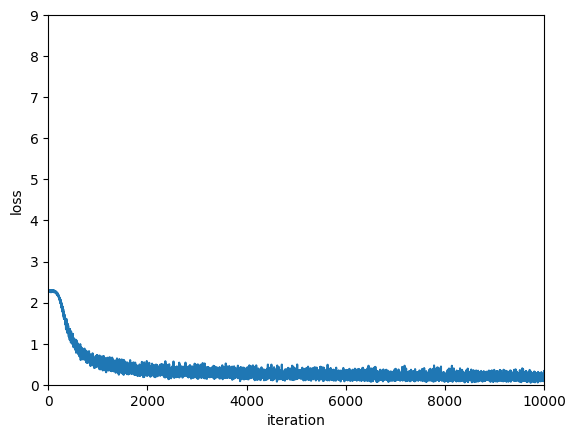

In [15]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 9)
plt.xlim(0, 10000)
plt.show()

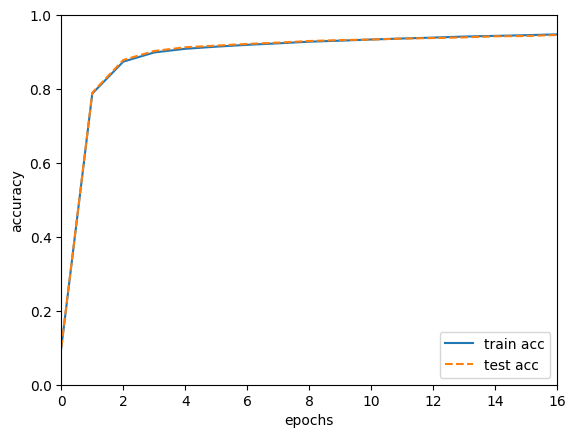

In [16]:
# 정확도 그래프 그리기
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.xlim(0, 16)
plt.legend(loc='lower right')
plt.show()